In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 40
batch_size = 64
learning_rate = 0.001

### MNIST dataset 정의하기

In [2]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

### 정해진 조건(batch_size, transform, shuffle등등)으로 데이터를 공급할수 있는 dataloader 정의하기

In [3]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### 2-Layer linear 모델 정의하기

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

### model parameter(weight, bias) 확인하기
- nn.Linear함수는 default로 bias가 True로 되어 있어 [output_dim, input_dim], [output_dim] 2개 array의 파라미터를 가지고 있다.
- nn.Linear 매개변수로 bias를 False로 하면 [output_dim, input_dim] array 1개의 파라미터만 생성된다.

#### bias가 True 일때

In [6]:
params = list(model.parameters())

print(f'bias True 일때 parameter array 총 개수:{len(params)}')
for i in range(len(params)):
    print(f'parameter array shape: {params[i].shape}')

bias True 일때 parameter array 총 개수:4
parameter array shape: torch.Size([500, 784])
parameter array shape: torch.Size([500])
parameter array shape: torch.Size([10, 500])
parameter array shape: torch.Size([10])


#### bias가 False 일때

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=False) 
        self.relu = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes, bias=False)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [8]:
params = list(model.parameters())

print(f'bias True 일때 parameter array 총 개수:{len(params)}')
for i in range(len(params)):
    print(f'parameter array shape: {params[i].shape}')

bias True 일때 parameter array 총 개수:2
parameter array shape: torch.Size([500, 784])
parameter array shape: torch.Size([10, 500])


### Loss값 및 gradient값 확인하기

In [10]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## backpropagation전 후 weight 값 확인하기

In [23]:
for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    output = model(images)
    loss = criterion(output, labels)
    
    print('================================================')
    optimizer.zero_grad()
    
    zero_grad_list = []
    params = list(model.parameters())
    print(f'zero_grad:')
    for i in range(len(params)):
        print(f'    grad {params[i].grad.mean()}')
        print(f'    weight {params[i].mean().detach().item()}')
    print('----------------------------------------------')
    
    loss.backward()
    backward_list = []
    params = list(model.parameters())
    print(f'backward:')
    for i in range(len(params)):
        print(f'    grad {params[i].grad.mean()}')
        print(f'    weight {params[i].mean().detach().item()}')
    print('----------------------------------------------')
    
    optimizer.step()
    step_list = []
    params = list(model.parameters())
    print(f'gradient step:')
    for i in range(len(params)):
        print(f'    grad {params[i].grad.mean()}')
        print(f'    weight {params[i].mean().detach().item()}')
    print('================================================')
    print()
    
    
    

    #print(loss.item())

zero_grad:
    grad 0.0
    weight 6.146079613245092e-06
    grad 0.0
    weight -0.00026843458181247115
----------------------------------------------
backward:
    grad -2.7736710762837902e-05
    weight 6.146079613245092e-06
    grad 1.7508864150195258e-11
    weight -0.00026843458181247115
----------------------------------------------
gradient step:
    grad -2.7736710762837902e-05
    weight 6.1739797274640296e-06
    grad 1.7508864150195258e-11
    weight -0.0002684345527086407

zero_grad:
    grad 0.0
    weight 6.1739797274640296e-06
    grad 0.0
    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad -2.0032395696034655e-05
    weight 6.1739797274640296e-06
    grad -1.1525116798416501e-11
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad -2.0032395696034655e-05
    weight 6.193934041220928e-06
    grad -1.1525116798416501e-11
    weight -0.00026843452360481024

zero_grad:
    g

    grad 0.0
    weight -0.0002684346109163016
----------------------------------------------
backward:
    grad -1.9547680494724773e-05
    weight 6.462307737820083e-06
    grad 4.6938657821682384e-11
    weight -0.0002684346109163016
----------------------------------------------
gradient step:
    grad -1.9547680494724773e-05
    weight 6.481890977738658e-06
    grad 4.6938657821682384e-11
    weight -0.00026843452360481024

zero_grad:
    grad 0.0
    weight 6.481890977738658e-06
    grad 0.0
    weight -0.00026843452360481024
----------------------------------------------
backward:
    grad -5.246459841146134e-05
    weight 6.481890977738658e-06
    grad 1.4808029802360068e-11
    weight -0.00026843452360481024
----------------------------------------------
gradient step:
    grad -5.246459841146134e-05
    weight 6.534342901431955e-06
    grad 1.4808029802360068e-11
    weight -0.0002684344653971493

zero_grad:
    grad 0.0
    weight 6.534342901431955e-06
    grad 0.0
    weight

zero_grad:
    grad 0.0
    weight 6.7434602897264995e-06
    grad 0.0
    weight -0.0002684344653971493
----------------------------------------------
backward:
    grad -3.233370080124587e-05
    weight 6.7434602897264995e-06
    grad -6.519257789855404e-13
    weight -0.0002684344653971493
----------------------------------------------
gradient step:
    grad -3.233370080124587e-05
    weight 6.775745532650035e-06
    grad -6.519257789855404e-13
    weight -0.00026843437808565795

zero_grad:
    grad 0.0
    weight 6.775745532650035e-06
    grad 0.0
    weight -0.00026843437808565795
----------------------------------------------
backward:
    grad -6.699014193145558e-05
    weight 6.775745532650035e-06
    grad -3.1525268506804593e-11
    weight -0.00026843437808565795
----------------------------------------------
gradient step:
    grad -6.699014193145558e-05
    weight 6.842626135039609e-06
    grad -3.1525268506804593e-11
    weight -0.00026843458181247115

zero_grad:
    grad 

zero_grad:
    grad 0.0
    weight 7.047574854368577e-06
    grad 0.0
    weight -0.00026843458181247115
----------------------------------------------
backward:
    grad -1.3734237654716708e-05
    weight 7.047574854368577e-06
    grad -4.712492202019192e-11
    weight -0.00026843458181247115
----------------------------------------------
gradient step:
    grad -1.3734237654716708e-05
    weight 7.06142191120307e-06
    grad -4.712492202019192e-11
    weight -0.0002684345527086407

zero_grad:
    grad 0.0
    weight 7.06142191120307e-06
    grad 0.0
    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad -2.051747105724644e-05
    weight 7.06142191120307e-06
    grad -7.748603841895019e-11
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad -2.051747105724644e-05
    weight 7.0818973654240835e-06
    grad -7.748603841895019e-11
    weight -0.0002684345527086407

zero_grad:
    grad 0.0
  

backward:
    grad 1.8984690541401505e-05
    weight 7.3958422035502736e-06
    grad 3.715977178742058e-11
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad 1.8984690541401505e-05
    weight 7.376815574389184e-06
    grad 3.715977178742058e-11
    weight -0.00026843464002013206

zero_grad:
    grad 0.0
    weight 7.376815574389184e-06
    grad 0.0
    weight -0.00026843464002013206
----------------------------------------------
backward:
    grad -1.304777561017545e-05
    weight 7.376815574389184e-06
    grad 3.876630353533139e-12
    weight -0.00026843464002013206
----------------------------------------------
gradient step:
    grad -1.304777561017545e-05
    weight 7.38992048354703e-06
    grad 3.876630353533139e-12
    weight -0.0002684346691239625

zero_grad:
    grad 0.0
    weight 7.38992048354703e-06
    grad 0.0
    weight -0.0002684346691239625
----------------------------------------------
backward:
    grad -4.26019360

zero_grad:
    grad 0.0
    weight 7.4869194577331655e-06
    grad 0.0
    weight -0.0002684346691239625
----------------------------------------------
backward:
    grad -3.185780587955378e-05
    weight 7.4869194577331655e-06
    grad -4.5076012367140095e-11
    weight -0.0002684346691239625
----------------------------------------------
gradient step:
    grad -3.185780587955378e-05
    weight 7.518771781178657e-06
    grad -4.5076012367140095e-11
    weight -0.00026843478553928435

zero_grad:
    grad 0.0
    weight 7.518771781178657e-06
    grad 0.0
    weight -0.00026843478553928435
----------------------------------------------
backward:
    grad -1.7083004422602244e-05
    weight 7.518771781178657e-06
    grad 4.377215950812641e-11
    weight -0.00026843478553928435
----------------------------------------------
gradient step:
    grad -1.7083004422602244e-05
    weight 7.53588165025576e-06
    grad 4.377215950812641e-11
    weight -0.00026843458181247115

zero_grad:
    grad 0

zero_grad:
    grad 0.0
    weight 7.776368875056505e-06
    grad 0.0
    weight -0.00026843472733162344
----------------------------------------------
backward:
    grad 1.679268643783871e-05
    weight 7.776368875056505e-06
    grad 3.725290215195187e-11
    weight -0.00026843472733162344
----------------------------------------------
gradient step:
    grad 1.679268643783871e-05
    weight 7.759545951557811e-06
    grad 3.725290215195187e-11
    weight -0.00026843464002013206

zero_grad:
    grad 0.0
    weight 7.759545951557811e-06
    grad 0.0
    weight -0.00026843464002013206
----------------------------------------------
backward:
    grad -2.3768056053086184e-05
    weight 7.759545951557811e-06
    grad 8.009374413697756e-12
    weight -0.00026843464002013206
----------------------------------------------
gradient step:
    grad -2.3768056053086184e-05
    weight 7.783251021464821e-06
    grad 8.009374413697756e-12
    weight -0.00026843464002013206

zero_grad:
    grad 0.0
  

zero_grad:
    grad 0.0
    weight 8.08340610092273e-06
    grad 0.0
    weight -0.00026843484374694526
----------------------------------------------
backward:
    grad -7.598344836878823e-06
    weight 8.08340610092273e-06
    grad 3.725290475403709e-12
    weight -0.00026843484374694526
----------------------------------------------
gradient step:
    grad -7.598344836878823e-06
    weight 8.090963092399761e-06
    grad 3.725290475403709e-12
    weight -0.0002684346691239625

zero_grad:
    grad 0.0
    weight 8.090963092399761e-06
    grad 0.0
    weight -0.0002684346691239625
----------------------------------------------
backward:
    grad 1.7068552551791072e-05
    weight 8.090963092399761e-06
    grad -2.677552407223671e-12
    weight -0.0002684346691239625
----------------------------------------------
gradient step:
    grad 1.7068552551791072e-05
    weight 8.073912795225624e-06
    grad -2.677552407223671e-12
    weight -0.000268434698227793

zero_grad:
    grad 0.0
    wei

zero_grad:
    grad 0.0
    weight 8.362691005459055e-06
    grad 0.0
    weight -0.0002684348728507757
----------------------------------------------
backward:
    grad -4.939087375532836e-05
    weight 8.362691005459055e-06
    grad 3.818422661394649e-11
    weight -0.0002684348728507757
----------------------------------------------
gradient step:
    grad -4.939087375532836e-05
    weight 8.412102943111677e-06
    grad 3.818422661394649e-11
    weight -0.00026843478553928435

zero_grad:
    grad 0.0
    weight 8.412102943111677e-06
    grad 0.0
    weight -0.00026843478553928435
----------------------------------------------
backward:
    grad -1.6019206668715924e-05
    weight 8.412102943111677e-06
    grad -5.774200128455531e-12
    weight -0.00026843478553928435
----------------------------------------------
gradient step:
    grad -1.6019206668715924e-05
    weight 8.428169167018496e-06
    grad -5.774200128455531e-12
    weight -0.00026843484374694526

zero_grad:
    grad 0.0


zero_grad:
    grad 0.0
    weight 8.638921826786827e-06
    grad 0.0
    weight -0.00026843472733162344
----------------------------------------------
backward:
    grad 6.278291039052419e-06
    weight 8.638921826786827e-06
    grad 4.880130327622467e-11
    weight -0.00026843472733162344
----------------------------------------------
gradient step:
    grad 6.278291039052419e-06
    weight 8.632727258373052e-06
    grad 4.880130327622467e-11
    weight -0.0002684346691239625

zero_grad:
    grad 0.0
    weight 8.632727258373052e-06
    grad 0.0
    weight -0.0002684346691239625
----------------------------------------------
backward:
    grad 1.137229355663294e-05
    weight 8.632727258373052e-06
    grad 4.3772160375488145e-12
    weight -0.0002684346691239625
----------------------------------------------
gradient step:
    grad 1.137229355663294e-05
    weight 8.621360393590294e-06
    grad 4.3772160375488145e-12
    weight -0.00026843472733162344

zero_grad:
    grad 0.0
    wei

zero_grad:
    grad 0.0
    weight 8.760884156799875e-06
    grad 0.0
    weight -0.00026843458181247115
----------------------------------------------
backward:
    grad -6.022068555466831e-05
    weight 8.760884156799875e-06
    grad -1.5459954497143436e-11
    weight -0.00026843458181247115
----------------------------------------------
gradient step:
    grad -6.022068555466831e-05
    weight 8.821012670523487e-06
    grad -1.5459954497143436e-11
    weight -0.0002684345527086407

zero_grad:
    grad 0.0
    weight 8.821012670523487e-06
    grad 0.0
    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad -4.7920544602675363e-05
    weight 8.821012670523487e-06
    grad 1.5739350794907736e-11
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad -4.7920544602675363e-05
    weight 8.86903035279829e-06
    grad 1.5739350794907736e-11
    weight -0.00026843452360481024

zero_grad:
    grad 0.

zero_grad:
    grad 0.0
    weight 9.157091881206725e-06
    grad 0.0
    weight -0.00026843472733162344
----------------------------------------------
backward:
    grad 1.853825779107865e-06
    weight 9.157091881206725e-06
    grad 1.4901160817412662e-12
    weight -0.00026843472733162344
----------------------------------------------
gradient step:
    grad 1.853825779107865e-06
    weight 9.155185580311809e-06
    grad 1.4901160817412662e-12
    weight -0.0002684346109163016

zero_grad:
    grad 0.0
    weight 9.155185580311809e-06
    grad 0.0
    weight -0.0002684346109163016
----------------------------------------------
backward:
    grad -5.095429878565483e-05
    weight 9.155185580311809e-06
    grad -4.0791928862526916e-11
    weight -0.0002684346109163016
----------------------------------------------
gradient step:
    grad -5.095429878565483e-05
    weight 9.20621369004948e-06
    grad -4.0791928862526916e-11
    weight -0.00026843464002013206

zero_grad:
    grad 0.0
  

zero_grad:
    grad 0.0
    weight 9.370940460939892e-06
    grad 0.0
    weight -0.00026843464002013206
----------------------------------------------
backward:
    grad -1.9689770851982757e-05
    weight 9.370940460939892e-06
    grad -7.692724235397463e-11
    weight -0.00026843464002013206
----------------------------------------------
gradient step:
    grad -1.9689770851982757e-05
    weight 9.390544619236607e-06
    grad -7.692724235397463e-11
    weight -0.0002684346691239625

zero_grad:
    grad 0.0
    weight 9.390544619236607e-06
    grad 0.0
    weight -0.0002684346691239625
----------------------------------------------
backward:
    grad -2.044885377472383e-06
    weight 9.390544619236607e-06
    grad 1.0151416166004346e-11
    weight -0.0002684346691239625
----------------------------------------------
gradient step:
    grad -2.044885377472383e-06
    weight 9.392636457050685e-06
    grad 1.0151416166004346e-11
    weight -0.0002684346691239625

zero_grad:
    grad 0.0


    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad -3.6945275496691465e-05
    weight 9.674274224380497e-06
    grad 1.6205013025905046e-11
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad -3.6945275496691465e-05
    weight 9.711189704830758e-06
    grad 1.6205013025905046e-11
    weight -0.0002684344653971493

zero_grad:
    grad 0.0
    weight 9.711189704830758e-06
    grad 0.0
    weight -0.0002684344653971493
----------------------------------------------
backward:
    grad -2.0550654880935326e-05
    weight 9.711189704830758e-06
    grad 4.4144691374592426e-11
    weight -0.0002684344653971493
----------------------------------------------
gradient step:
    grad -2.0550654880935326e-05
    weight 9.731691534398124e-06
    grad 4.4144691374592426e-11
    weight -0.00026843478553928435

zero_grad:
    grad 0.0
    weight 9.731691534398124e-06
    grad 0.0
    weight -0.000268434

zero_grad:
    grad 0.0
    weight 9.867192602541763e-06
    grad 0.0
    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad -2.9586704840767197e-05
    weight 9.867192602541763e-06
    grad 5.308538678083785e-11
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad -2.9586704840767197e-05
    weight 9.896792107610963e-06
    grad 5.308538678083785e-11
    weight -0.00026843458181247115

zero_grad:
    grad 0.0
    weight 9.896792107610963e-06
    grad 0.0
    weight -0.00026843458181247115
----------------------------------------------
backward:
    grad -1.748123759170994e-05
    weight 9.896792107610963e-06
    grad 3.7252902043531655e-13
    weight -0.00026843458181247115
----------------------------------------------
gradient step:
    grad -1.748123759170994e-05
    weight 9.914268957800232e-06
    grad 3.7252902043531655e-13
    weight -0.0002684346109163016

zero_grad:
    grad 0.0
 

zero_grad:
    grad 0.0
    weight 1.0282248695148155e-05
    grad 0.0
    weight -0.00026843437808565795
----------------------------------------------
backward:
    grad -1.5223997252178378e-05
    weight 1.0282248695148155e-05
    grad -3.911554673913242e-12
    weight -0.00026843437808565795
----------------------------------------------
gradient step:
    grad -1.5223997252178378e-05
    weight 1.0297447261109482e-05
    grad -3.911554673913242e-12
    weight -0.0002684345527086407

zero_grad:
    grad 0.0
    weight 1.0297447261109482e-05
    grad 0.0
    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad -1.1842394087580033e-05
    weight 1.0297447261109482e-05
    grad 6.426125690600637e-12
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad -1.1842394087580033e-05
    weight 1.0309397111996077e-05
    grad 6.426125690600637e-12
    weight -0.00026843464002013206

zero_grad:
    gr

    weight -0.00026843452360481024
----------------------------------------------
backward:
    grad -3.810872294707224e-05
    weight 1.0389980161562562e-05
    grad -1.955777380324708e-11
    weight -0.00026843452360481024
----------------------------------------------
gradient step:
    grad -3.810872294707224e-05
    weight 1.0428106179460883e-05
    grad -1.955777380324708e-11
    weight -0.00026843452360481024

zero_grad:
    grad 0.0
    weight 1.0428106179460883e-05
    grad 0.0
    weight -0.00026843452360481024
----------------------------------------------
backward:
    grad -1.0196541552431881e-05
    weight 1.0428106179460883e-05
    grad -1.8440186877466402e-11
    weight -0.00026843452360481024
----------------------------------------------
gradient step:
    grad -1.0196541552431881e-05
    weight 1.0438167009851895e-05
    grad -1.8440186877466402e-11
    weight -0.00026843443629331887

zero_grad:
    grad 0.0
    weight 1.0438167009851895e-05
    grad 0.0
    weight -

zero_grad:
    grad 0.0
    weight 1.0630516044329852e-05
    grad 0.0
    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad -1.6265817976091057e-05
    weight 1.0630516044329852e-05
    grad -1.3690442009217652e-11
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad -1.6265817976091057e-05
    weight 1.0646685950632673e-05
    grad -1.3690442009217652e-11
    weight -0.00026843437808565795

zero_grad:
    grad 0.0
    weight 1.0646685950632673e-05
    grad 0.0
    weight -0.00026843437808565795
----------------------------------------------
backward:
    grad -3.4970489650731906e-05
    weight 1.0646685950632673e-05
    grad 1.3783574108472418e-11
    weight -0.00026843437808565795
----------------------------------------------
gradient step:
    grad -3.4970489650731906e-05
    weight 1.0681734238460194e-05
    grad 1.3783574108472418e-11
    weight -0.0002684344945009798

zero_grad:
  

zero_grad:
    grad 0.0
    weight 1.0872848179133143e-05
    grad 0.0
    weight -0.0002684344071894884
----------------------------------------------
backward:
    grad -2.0875886548310518e-05
    weight 1.0872848179133143e-05
    grad 4.1723249855074585e-11
    weight -0.0002684344071894884
----------------------------------------------
gradient step:
    grad -2.0875886548310518e-05
    weight 1.0893668331846129e-05
    grad 4.1723249855074585e-11
    weight -0.00026843452360481024

zero_grad:
    grad 0.0
    weight 1.0893668331846129e-05
    grad 0.0
    weight -0.00026843452360481024
----------------------------------------------
backward:
    grad -2.2280088160187006e-05
    weight 1.0893668331846129e-05
    grad 1.825392267895687e-11
    weight -0.00026843452360481024
----------------------------------------------
gradient step:
    grad -2.2280088160187006e-05
    weight 1.0916005521721672e-05
    grad 1.825392267895687e-11
    weight -0.00026843431987799704

zero_grad:
    g

zero_grad:
    grad 0.0
    weight 1.1124031516374089e-05
    grad 0.0
    weight -0.00026843452360481024
----------------------------------------------
backward:
    grad 3.4842776130972197e-06
    weight 1.1124031516374089e-05
    grad 9.685754802368773e-12
    weight -0.00026843452360481024
----------------------------------------------
gradient step:
    grad 3.4842776130972197e-06
    weight 1.1120444469270296e-05
    grad 9.685754802368773e-12
    weight -0.00026843431987799704

zero_grad:
    grad 0.0
    weight 1.1120444469270296e-05
    grad 0.0
    weight -0.00026843431987799704
----------------------------------------------
backward:
    grad 2.6606927349348553e-05
    weight 1.1120444469270296e-05
    grad 3.209570456630395e-11
    weight -0.00026843431987799704
----------------------------------------------
gradient step:
    grad 2.6606927349348553e-05
    weight 1.109398635890102e-05
    grad 3.209570456630395e-11
    weight -0.00026843443629331887

zero_grad:
    grad 0

zero_grad:
    grad 0.0
    weight 1.1376376278349198e-05
    grad 0.0
    weight -0.0002684346109163016
----------------------------------------------
backward:
    grad -9.79953802016098e-06
    weight 1.1376376278349198e-05
    grad 4.47034857048445e-12
    weight -0.0002684346109163016
----------------------------------------------
gradient step:
    grad -9.79953802016098e-06
    weight 1.1386214282538276e-05
    grad 4.47034857048445e-12
    weight -0.0002684344653971493

zero_grad:
    grad 0.0
    weight 1.1386214282538276e-05
    grad 0.0
    weight -0.0002684344653971493
----------------------------------------------
backward:
    grad 9.132691047852859e-06
    weight 1.1386214282538276e-05
    grad -2.7567148216944837e-11
    weight -0.0002684344653971493
----------------------------------------------
gradient step:
    grad 9.132691047852859e-06
    weight 1.1376992006262299e-05
    grad -2.7567148216944837e-11
    weight -0.0002684344071894884

zero_grad:
    grad 0.0
    

zero_grad:
    grad 0.0
    weight 1.1625787010416389e-05
    grad 0.0
    weight -0.0002684345527086407
----------------------------------------------
backward:
    grad 3.929631566279568e-05
    weight 1.1625787010416389e-05
    grad -9.313226188509272e-13
    weight -0.0002684345527086407
----------------------------------------------
gradient step:
    grad 3.929631566279568e-05
    weight 1.1586542314034887e-05
    grad -9.313226188509272e-13
    weight -0.00026843452360481024

zero_grad:
    grad 0.0
    weight 1.1586542314034887e-05
    grad 0.0
    weight -0.00026843452360481024
----------------------------------------------
backward:
    grad -2.0823343220399693e-05
    weight 1.1586542314034887e-05
    grad 1.0253861648656937e-10
    weight -0.00026843452360481024
----------------------------------------------
gradient step:
    grad -2.0823343220399693e-05
    weight 1.1607296983129345e-05
    grad 1.0253861648656937e-10
    weight -0.00026843458181247115

zero_grad:
    gra

zero_grad:
    grad 0.0
    weight 1.1740324225684162e-05
    grad 0.0
    weight -0.0002684344653971493
----------------------------------------------
backward:
    grad 1.5054960385896266e-05
    weight 1.1740324225684162e-05
    grad 9.872019000878307e-12
    weight -0.0002684344653971493
----------------------------------------------
gradient step:
    grad 1.5054960385896266e-05
    weight 1.1725267540896311e-05
    grad 9.872019000878307e-12
    weight -0.00026843458181247115

zero_grad:
    grad 0.0
    weight 1.1725267540896311e-05
    grad 0.0
    weight -0.00026843458181247115
----------------------------------------------
backward:
    grad -2.022039325311198e-06
    weight 1.1725267540896311e-05
    grad 8.381902810716824e-12
    weight -0.00026843458181247115
----------------------------------------------
gradient step:
    grad -2.022039325311198e-06
    weight 1.172730844700709e-05
    grad 8.381902810716824e-12
    weight -0.00026843464002013206

zero_grad:
    grad 0.0

zero_grad:
    grad 0.0
    weight 1.1779370652220678e-05
    grad 0.0
    weight -0.0002684344653971493
----------------------------------------------
backward:
    grad 6.030013537383638e-06
    weight 1.1779370652220678e-05
    grad -1.3038516447072546e-11
    weight -0.0002684344653971493
----------------------------------------------
gradient step:
    grad 6.030013537383638e-06
    weight 1.1773365258704871e-05
    grad -1.3038516447072546e-11
    weight -0.00026843458181247115

zero_grad:
    grad 0.0
    weight 1.1773365258704871e-05
    grad 0.0
    weight -0.00026843458181247115
----------------------------------------------
backward:
    grad -1.4989985174906906e-05
    weight 1.1773365258704871e-05
    grad -1.7508864150195258e-11
    weight -0.00026843458181247115
----------------------------------------------
gradient step:
    grad -1.4989985174906906e-05
    weight 1.1788356459874194e-05
    grad -1.7508864150195258e-11
    weight -0.0002684344653971493

zero_grad:
    

zero_grad:
    grad 0.0
    weight 1.2033228813379537e-05
    grad 0.0
    weight -0.0002684344653971493
----------------------------------------------
backward:
    grad 1.1570280548767187e-05
    weight 1.2033228813379537e-05
    grad -3.5017728300390516e-11
    weight -0.0002684344653971493
----------------------------------------------
gradient step:
    grad 1.1570280548767187e-05
    weight 1.2021663678751793e-05
    grad -3.5017728300390516e-11
    weight -0.00026843452360481024

zero_grad:
    grad 0.0
    weight 1.2021663678751793e-05
    grad 0.0
    weight -0.00026843452360481024
----------------------------------------------
backward:
    grad -1.3284655324241612e-05
    weight 1.2021663678751793e-05
    grad 1.0058284066749579e-11
    weight -0.00026843452360481024
----------------------------------------------
gradient step:
    grad -1.3284655324241612e-05
    weight 1.2034955034323502e-05
    grad 1.0058284066749579e-11
    weight -0.0002684346691239625

zero_grad:
    

KeyboardInterrupt: 

## 연결된 computation graph 타고 올라가기 

In [35]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions[0][0])

None


In [37]:
loss.grad_fn.next_functions[0]

(<LogSoftmaxBackward at 0x131ac7410>, 0)

In [30]:
a = torch.randn(2)
#a.requires_grad = True

In [31]:
a

tensor([-0.7529,  0.0766])

In [32]:
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            ave_grads.append(p.grad.abs().mean())
    plt.plot(ave_grads, alpha=0.3, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, linewidth=1, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)

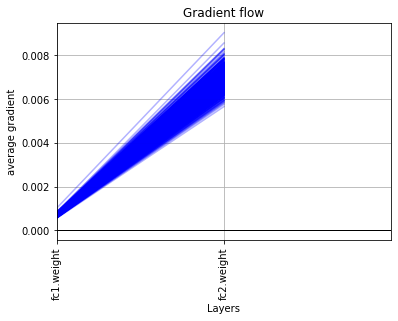

In [34]:
for (images, labels) in train_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    output = model(images)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plot_grad_flow(model.named_parameters())
    
    #print(loss.item())